In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import nibabel as nib
import cv2
import yaml
from PIL import Image

In [2]:
with open('config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

In [3]:
config

{'acdc': {'path_acdc': '/home/euloo/Documents/datasets/acdc',
  'path_processed': '/home/euloo/Documents/datasets/heart_segmentation/acdc'},
 'emidec': {'path_emidec': '/home/euloo/Documents/datasets/emidec-dataset-1.0.1',
  'path_processed': '/home/euloo/Documents/datasets/heart_segmentation/emidec'}}

# ACDC
0 - background
1 - right ventricular cavity
2 - myocardium
3 - left ventricular cavity

In [4]:
patient = '008'
frame = '01'

In [5]:
img = nib.load(config['acdc']['path_acdc'] + '/patient' + patient + "/patient" + patient + '_frame' + frame + '.nii.gz')
msk = nib.load(config['acdc']['path_acdc'] + '/patient' + patient + "/patient" + patient + '_frame' + frame + '_gt.nii.gz')

In [6]:
img.shape

(200, 256, 10)

In [7]:
img = img.get_fdata().astype(int)
msk = msk.get_fdata().astype(int)

In [8]:
img.dtype

dtype('int64')

In [9]:
img.shape, msk.shape

((200, 256, 10), (200, 256, 10))

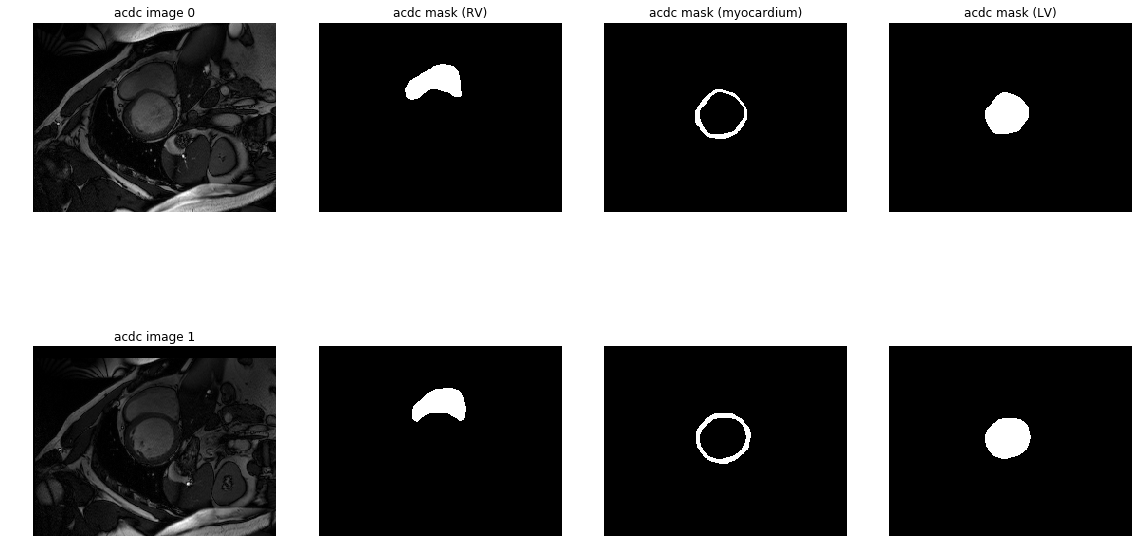

In [10]:
plt.figure(figsize=(16,10))

plt.subplot(241)
plt.title('acdc image 0')
plt.imshow(img[:,:,0], cmap = 'gray')
plt.axis('off')
plt.subplot(242)
plt.title('acdc mask (RV)')
plt.imshow(msk[:,:,0] == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(243)
plt.title('acdc mask (myocardium)')
plt.imshow(msk[:,:,0] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(244)
plt.title('acdc mask (LV)')
plt.imshow(msk[:,:,0] == 3, cmap = 'gray')
plt.axis('off')
plt.subplot(245)
plt.title('acdc image 1')
plt.imshow(img[:,:,1], cmap = 'gray')
plt.axis('off')
plt.subplot(246)

plt.imshow(msk[:,:,1] == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(247)

plt.imshow(msk[:,:,1] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(248)

plt.imshow(msk[:,:,1] == 3, cmap = 'gray')
plt.axis('off')

plt.tight_layout()

# Original np from nii

In [11]:
msk[:,:,0].min(), msk[:,:,0].max()

(0, 3)

In [12]:
msk.dtype

dtype('int64')

In [13]:
for i in range(msk[:,:,0].min(), msk[:,:,0].max() + 1):
    print(i, np.sum(msk[:,:,0] == i))

0 47563
1 1458
2 638
3 1541


In [14]:
#!mkdir data

# write

In [15]:
cv2.imwrite('data/acdc_cv2.png', img[:,:,0])
cv2.imwrite('data/acdc_cv2_gt.png', msk[:,:,0])

plt.imsave('data/acdc_plt.jpeg', img[:,:,0])
plt.imsave('data/acdc_plt_gt.jpeg', msk[:,:,0])

#im_PIL = Image.fromarray(img[:,:,0])#.convert('L') # TypeError: Cannot handle this data type
#msk_PIL = Image.fromarray(msk[:,:,0])#.convert('L')
#im_PIL.save('data/acdc_PIL.jpg')
#msk_PIL.save('data/acdc_PIL_gt.jpg')

np.save('data/acdc_np.npy', msk[:,:,0])

In [16]:
msk_cv2 = cv2.imread('data/acdc_cv2_gt.png', 0) # -1
msk_plt = plt.imread('data/acdc_plt_gt.jpeg')
msk_np = np.load('data/acdc_np.npy')
#msk_PIL = Image.open('data/acdc_PIL_gt.jpg')
#msk_PIL = np.array(msk_PIL)

In [17]:
msk_cv2.shape, msk_plt.shape, msk_np.shape#, msk_PIL.shape

((200, 256), (200, 256, 3), (200, 256))

# cv2 [OK]

In [18]:
msk_cv2.min(), msk_cv2.max()

(0, 3)

In [19]:
for i in range(msk_cv2.min(), msk_cv2.max() + 1):
    print(i, np.sum(msk_cv2 == i))

0 47563
1 1458
2 638
3 1541


# plt [FAIL]

In [20]:
msk_plt.min(), msk_plt.max()

(0, 255)

In [21]:
for i in range(msk_plt.min(), msk_plt.max() + 1):
    s = np.sum(msk_plt == i)
    if s != 0:
        print(i, s)

0 46390
1 310
2 221
3 205
4 110
5 64
6 39
7 25
8 15
9 19
10 17
11 17
12 12
13 11
14 23
15 16
16 17
17 19
18 14
19 23
20 23
21 18
22 23
23 29
24 22
25 28
26 19
27 41
28 25
29 64
30 21
31 64
32 84
33 36
34 90
35 34
36 601
37 42
38 104
39 59
40 110
41 91
42 77
43 125
44 71
45 127
46 148
47 80
48 423
49 137
50 138
51 56
52 107
53 62
54 39
55 59
56 49
57 49
58 55
59 59
60 39
61 87
62 103
63 60
64 153
65 228
66 277
67 59
68 45379
69 282
70 80
71 222
72 170
73 137
74 65
75 96
76 106
77 52
78 107
79 86
80 143
81 198
82 133
83 46266
84 119
85 164
86 90
87 105
88 74
89 46
90 53
91 33
92 48
93 26
94 40
95 27
96 28
97 31
98 35
99 40
100 75
101 124
102 140
103 147
104 450
105 149
106 125
107 57
108 47
109 40
110 27
111 24
112 23
113 13
114 25
115 14
116 16
117 13
118 17
119 13
120 23
121 18
122 12
123 18
124 18
125 22
126 24
127 14
128 18
129 15
130 30
131 17
132 27
133 24
134 21
135 46
136 26
137 58
138 42
139 114
140 84
141 618
142 153
143 87
144 74
145 30
146 40
147 14
148 30
149 20
150 16
151 1

# PIL [FAIL]

In [23]:
msk_PIL.min(), msk_PIL.max()

In [276]:
for i in range(msk_PIL.min(), msk_PIL.max() + 1):
    s = np.sum(msk_PIL == i)
    if s != 0:
        print(i, s)

0 47442
1 1699
2 418
3 1598
4 43


# numpy [OK]

In [24]:
msk_np.min(), msk_np.max()

(0, 3)

In [25]:
for i in range(msk_np.min(), msk_np.max() + 1):
    s = np.sum(msk_np == i)
    if s != 0:
        print(i, s)

0 47563
1 1458
2 638
3 1541


# snakemake missing files
~~~
Waiting at most 5 seconds for missing files.
MissingOutputException in line 21 of /home/euloo/Documents/GitHub/heart_segmentation/snakefile_acdc:
Job completed successfully, but some output files are missing. Missing files after 5 seconds:
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/064_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/064_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/010_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/010_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/052_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/052_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/095_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/095_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/061_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/061_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/027_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/027_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/059_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/059_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/011_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/011_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/090_04_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/090_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/036_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/036_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/080_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/080_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/041_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/041_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/046_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/046_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/070_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/070_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/016_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/016_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/040_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/040_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/025_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/025_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/048_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/048_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/038_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/038_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/043_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/043_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/031_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/031_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/094_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/094_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/017_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/017_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/051_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/051_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/086_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/086_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/026_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/026_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/079_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/079_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/032_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/032_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/029_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/029_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/057_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/057_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/028_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/028_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/062_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/062_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/096_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/096_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/039_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/039_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/067_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/067_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/002_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/002_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/037_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/037_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/075_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/075_06_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/089_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/089_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/074_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/074_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/091_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/091_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/078_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/078_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/034_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/034_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/085_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/085_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/058_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/058_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/083_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/083_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/068_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/068_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/014_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/014_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/073_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/073_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/013_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/013_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/024_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/024_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/049_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/049_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/047_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/047_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/077_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/077_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/063_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/063_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/004_15_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/004_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/012_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/012_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/006_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/006_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/019_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/019_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/022_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/022_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/045_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/045_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/088_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/088_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/050_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/050_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/007_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/007_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/020_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/020_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/055_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/055_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/071_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/071_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/005_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/005_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/072_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/072_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/099_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/099_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/015_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/015_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/082_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/082_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/009_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/009_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/033_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/033_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/042_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/042_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/069_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/069_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/021_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/021_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/098_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/098_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/081_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/081_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/003_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/003_15_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/087_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/087_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/092_06_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/092_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/008_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/008_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/066_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/066_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/030_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/030_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/053_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/053_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/035_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/035_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/100_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/100_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/018_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/018_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/084_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/084_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/076_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/076_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/054_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/054_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/023_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/023_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/065_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/065_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/056_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/056_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/060_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/060_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/097_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/097_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/093_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/093_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/044_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/044_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/001_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/images/001_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/064_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/064_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/010_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/010_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/052_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/052_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/095_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/095_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/061_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/061_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/027_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/027_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/059_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/059_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/011_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/011_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/090_04_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/090_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/036_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/036_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/080_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/080_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/041_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/041_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/046_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/046_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/070_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/070_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/016_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/016_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/040_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/040_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/025_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/025_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/048_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/048_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/038_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/038_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/043_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/043_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/031_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/031_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/094_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/094_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/017_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/017_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/051_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/051_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/086_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/086_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/026_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/026_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/079_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/079_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/032_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/032_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/029_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/029_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/057_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/057_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/028_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/028_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/062_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/062_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/096_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/096_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/039_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/039_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/067_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/067_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/002_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/002_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/037_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/037_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/075_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/075_06_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/089_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/089_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/074_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/074_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/091_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/091_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/078_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/078_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/034_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/034_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/085_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/085_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/058_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/058_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/083_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/083_08_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/068_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/068_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/014_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/014_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/073_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/073_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/013_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/013_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/024_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/024_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/049_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/049_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/047_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/047_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/077_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/077_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/063_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/063_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/004_15_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/004_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/012_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/012_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/006_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/006_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/019_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/019_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/022_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/022_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/045_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/045_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/088_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/088_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/050_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/050_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/007_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/007_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/020_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/020_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/055_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/055_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/071_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/071_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/005_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/005_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/072_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/072_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/099_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/099_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/015_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/015_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/082_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/082_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/009_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/009_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/033_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/033_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/042_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/042_16_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/069_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/069_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/021_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/021_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/098_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/098_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/081_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/081_07_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/003_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/003_15_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/087_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/087_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/092_06_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/092_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/008_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/008_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/066_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/066_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/030_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/030_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/053_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/053_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/035_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/035_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/100_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/100_13_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/018_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/018_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/084_10_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/084_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/076_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/076_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/054_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/054_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/023_09_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/023_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/065_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/065_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/056_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/056_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/060_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/060_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/097_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/097_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/093_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/093_14_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/044_01_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/044_11_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/001_12_
/home/euloo/Documents/datasets/heart_segmentation/acdc/masks/001_01_
This might be due to filesystem latency. If that is the case, consider to increase the wait time with --latency-wait.
  File "/home/euloo/anaconda3/envs/py37/lib/python3.7/site-packages/snakemake/executors/__init__.py", line 544, in handle_job_success
  File "/home/euloo/anaconda3/envs/py37/lib/python3.7/site-packages/snakemake/executors/__init__.py", line 231, in handle_job_success
Shutting down, this might take some time.
Exiting because a job execution failed. Look above for error message
Complete log: /home/euloo/Documents/GitHub/heart_segmentation/.snakemake/log/2020-07-15T223111.844875.snakemake.log

~~~

In [26]:
patient = '080'
frame = '10'

In [27]:
img = nib.load(config['acdc']['path_acdc'] + '/patient' + patient + "/patient" + patient + '_frame' + frame + '.nii.gz')
msk = nib.load(config['acdc']['path_acdc'] + '/patient' + patient + "/patient" + patient + '_frame' + frame + '_gt.nii.gz')

In [28]:
img.shape, msk.shape

((216, 256, 6), (216, 256, 6))

In [29]:
img = img.get_fdata().astype(int)
msk = msk.get_fdata().astype(int)

In [30]:
img.shape, msk.shape

((216, 256, 6), (216, 256, 6))

In [33]:
i = 4
j = 5 

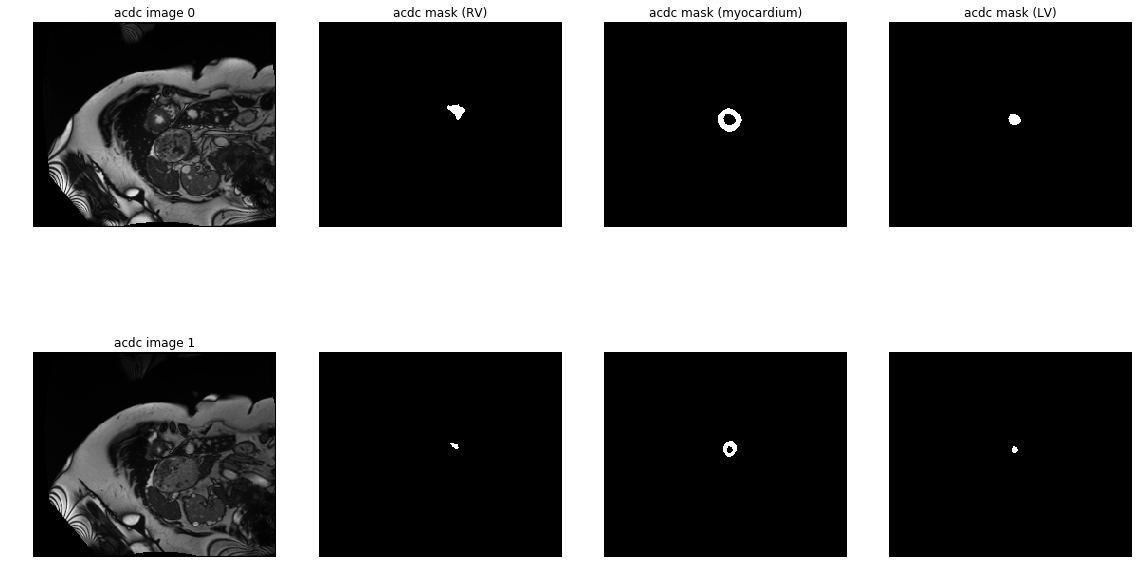

In [34]:
plt.figure(figsize=(16,10))

plt.subplot(241)
plt.title('acdc image 0')
plt.imshow(img[:,:,i], cmap = 'gray')
plt.axis('off')
plt.subplot(242)
plt.title('acdc mask (RV)')
plt.imshow(msk[:,:,i] == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(243)
plt.title('acdc mask (myocardium)')
plt.imshow(msk[:,:,i] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(244)
plt.title('acdc mask (LV)')
plt.imshow(msk[:,:,i] == 3, cmap = 'gray')
plt.axis('off')
plt.subplot(245)
plt.title('acdc image 1')
plt.imshow(img[:,:,j], cmap = 'gray')
plt.axis('off')
plt.subplot(246)

plt.imshow(msk[:,:,j] == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(247)

plt.imshow(msk[:,:,j] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(248)

plt.imshow(msk[:,:,j] == 3, cmap = 'gray')
plt.axis('off')

plt.tight_layout()

# EMIDEC
The datasets consist of 100 cases: 33 normal cases (indicated by the letter 'N') and 67 pathological cases (indicated by the letter 'P'). 

For each case, there is a text file with the clinical information, a nifti file with the images and a nifti file with the labelled mask of each area (__background, myocardium, cavity, myocardial infarction and no-reflow__) 

In [166]:
case = 'P031'

In [167]:
img = nib.load(config['emidec']['path_emidec'] + '/Case_' + case + '/Images/Case_' + case + '.nii.gz')
msk = nib.load(config['emidec']['path_emidec'] + '/Case_' + case + '/Contours/Case_' + case + '.nii.gz')

In [168]:
img = img.get_fdata().astype(int)
msk = msk.get_fdata().astype(int)

In [169]:
img.shape, msk.shape

((214, 270, 6), (214, 270, 6))

In [170]:
for i in range(msk[:,:,0].min(), msk[:,:,0].max() + 1):
    s = np.sum(msk[:,:,0] == i)
    if s != 0:
        print(i, s)

0 57003
1 381
2 379
3 17


In [171]:
img[:,:,0].min(), img[:,:,0].max()

(0, 4094)

In [172]:
img //= 16

In [173]:
img[:,:,0].min(), img[:,:,0].max()

(0, 255)

In [174]:
for i in range(img[:,:,0].min(), img[:,:,0].max() + 1):
    s = np.sum(img[:,:,0] == i)
    if s != 0:
        print(i, s)

0 5664
13 1
19 1
32 1
36 2
43 1
44 2
45 1
48 3
49 1
51 2
52 2
54 3
55 1
56 5
57 6
58 4
59 1
60 1
61 3
62 2
63 7
65 8
66 7
67 6
68 3
69 6
70 3
71 3
72 4
73 2
74 7
75 6
76 5
77 4
78 9
79 8
80 7
81 6
82 17
83 14
84 8
85 12
86 12
87 16
88 11
89 17
90 26
91 25
92 23
93 27
94 37
95 34
96 29
97 48
98 49
99 44
100 41
101 52
102 45
103 69
104 64
105 73
106 101
107 114
108 98
109 119
110 143
111 166
112 176
113 199
114 176
115 227
116 271
117 290
118 320
119 379
120 499
121 612
122 778
123 1007
124 1241
125 1569
126 1799
127 1881
128 2202
129 2055
130 1952
131 1667
132 1450
133 1197
134 956
135 889
136 737
137 667
138 601
139 581
140 577
141 551
142 580
143 642
144 666
145 700
146 716
147 763
148 774
149 783
150 717
151 653
152 626
153 633
154 619
155 565
156 559
157 551
158 569
159 652
160 684
161 660
162 662
163 640
164 580
165 515
166 506
167 412
168 378
169 358
170 316
171 317
172 298
173 266
174 234
175 221
176 224
177 181
178 179
179 201
180 156
181 158
182 144
183 122
184 144
185 109
186 

In [175]:
i = 0
j = 1

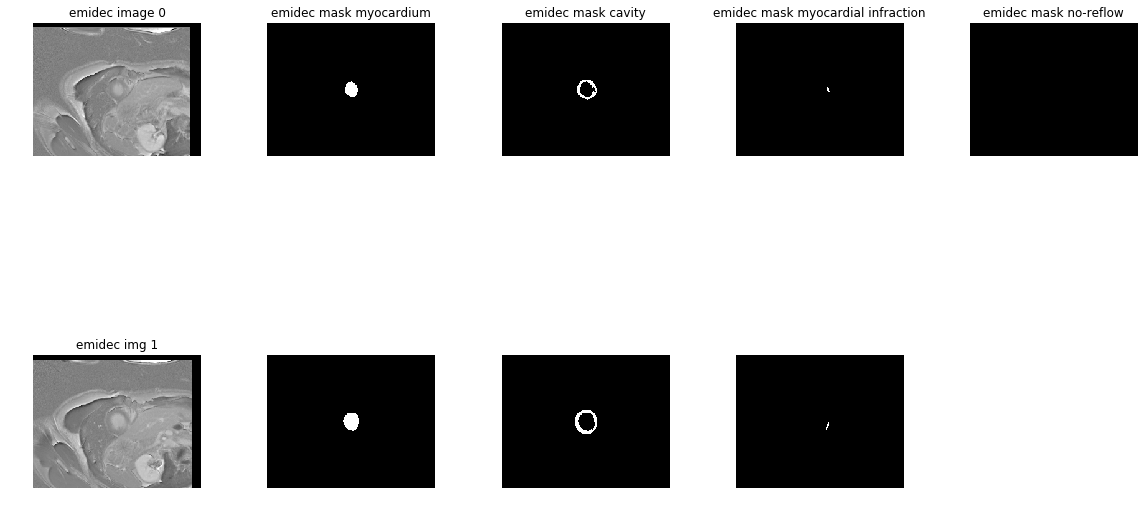

In [176]:
plt.figure(figsize=(16,10))

plt.subplot(251)
plt.title('emidec image 0')
plt.imshow(img[:,:,i], cmap = 'gray')
plt.axis('off')
plt.subplot(252)
plt.title('emidec mask myocardium')
plt.imshow(msk[:,:,i] == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(253)
plt.title('emidec mask cavity')
plt.imshow(msk[:,:,i] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(254)
plt.title('emidec mask myocardial infraction')
plt.imshow(msk[:,:,i] == 3, cmap = 'gray')
plt.axis('off')

plt.subplot(255)
plt.title('emidec mask no-reflow')
plt.imshow(msk[:,:,i] == 4, cmap = 'gray')
plt.axis('off')

plt.subplot(256)
plt.title('emidec img 1')
plt.imshow(img[:,:,j], cmap = 'gray')
plt.axis('off')

plt.subplot(257)
plt.imshow(msk[:,:,j] == 1, cmap = 'gray')
plt.axis('off')

plt.subplot(258)
plt.imshow(msk[:,:,j] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(259)

plt.imshow(msk[:,:,j] == 3, cmap = 'gray')
plt.axis('off')

plt.tight_layout()

## write emidec

In [177]:
cv2.imwrite('data/emidec_cv2.png', img[:,:,0])
cv2.imwrite('data/emidec_cv2_gt.png', msk[:,:,0])

True

## read emidec

In [178]:
img = cv2.imread('data/emidec_cv2.png', 0)
msk = cv2.imread('data/emidec_cv2_gt.png', 0)

In [179]:
img.shape, msk.shape

((214, 270), (214, 270))

In [180]:
msk.min(), msk.max()

(0, 3)

In [181]:
for i in range(msk.min(), msk.max() + 1):
    s = np.sum(msk == i)
    if s != 0:
        print(i, s)

0 57003
1 381
2 379
3 17


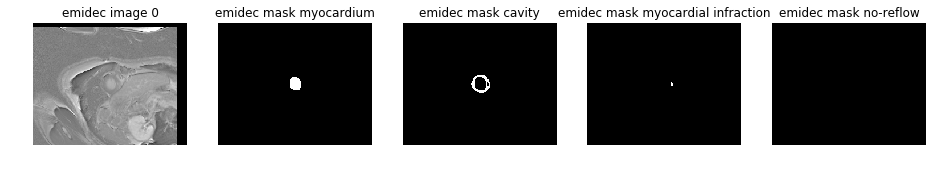

In [182]:
plt.figure(figsize=(16,10))

plt.subplot(151)
plt.title('emidec image 0')
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.subplot(152)
plt.title('emidec mask myocardium')
plt.imshow(msk == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(153)
plt.title('emidec mask cavity')
plt.imshow(msk == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(154)
plt.title('emidec mask myocardial infraction')
plt.imshow(msk == 3, cmap = 'gray')
plt.axis('off')

plt.subplot(155)
plt.title('emidec mask no-reflow')
plt.imshow(msk == 4, cmap = 'gray')
plt.axis('off');

In [183]:
for i in range(img.min(), img.max() + 1):
    s = np.sum(img == i)
    if s != 0:
        print(i, s)

0 5664
13 1
19 1
32 1
36 2
43 1
44 2
45 1
48 3
49 1
51 2
52 2
54 3
55 1
56 5
57 6
58 4
59 1
60 1
61 3
62 2
63 7
65 8
66 7
67 6
68 3
69 6
70 3
71 3
72 4
73 2
74 7
75 6
76 5
77 4
78 9
79 8
80 7
81 6
82 17
83 14
84 8
85 12
86 12
87 16
88 11
89 17
90 26
91 25
92 23
93 27
94 37
95 34
96 29
97 48
98 49
99 44
100 41
101 52
102 45
103 69
104 64
105 73
106 101
107 114
108 98
109 119
110 143
111 166
112 176
113 199
114 176
115 227
116 271
117 290
118 320
119 379
120 499
121 612
122 778
123 1007
124 1241
125 1569
126 1799
127 1881
128 2202
129 2055
130 1952
131 1667
132 1450
133 1197
134 956
135 889
136 737
137 667
138 601
139 581
140 577
141 551
142 580
143 642
144 666
145 700
146 716
147 763
148 774
149 783
150 717
151 653
152 626
153 633
154 619
155 565
156 559
157 551
158 569
159 652
160 684
161 660
162 662
163 640
164 580
165 515
166 506
167 412
168 378
169 358
170 316
171 317
172 298
173 266
174 234
175 221
176 224
177 181
178 179
179 201
180 156
181 158
182 144
183 122
184 144
185 109
186 

# sunnybrook cardiac data
2009 Cardiac MR Left Ventricle Segmentation Challenge

In [50]:
import pydicom

In [52]:
! ls "/home/euloo/Documents/datasets/scd/SCD_DeidentifiedImages/SCD0000101/1.216_29sSOG9riFiQfXpHFLC6Zj453OlBWiLWSxWS5LSwJbcf7neGtrQ_iHpfyZ7_KVjcy_-z_+x_256_256_-23/"

CAP_SCD0000101_MR__hrt_raw_20120813120610904_1.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120610916_2.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120610927_3.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120610940_4.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120610951_5.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120610963_6.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120610977_7.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120610994_8.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611006_9.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611017_10.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611032_11.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611043_12.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611055_13.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611068_14.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611080_15.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611091_16.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611103_17.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611117_18.dcm
CAP_SCD0000101_MR__hrt_raw_20120813120611129_19.dcm
CAP_SCD0000101_MR__hr

In [53]:
d = pydicom.read_file('/home/euloo/Documents/datasets/scd/SCD_DeidentifiedImages/SCD0000101/1.216_29sSOG9riFiQfXpHFLC6Zj453OlBWiLWSxWS5LSwJbcf7neGtrQ_iHpfyZ7_KVjcy_-z_+x_256_256_-23/CAP_SCD0000101_MR__hrt_raw_20120813120611055_13.dcm')

In [54]:
d

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.4397690831686956879
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.8188283439478048534
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: ''
-------------------------------------------------
(0008, 0000) Group Length                        UL: 680
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TIME_COURSE', 'NONE']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instanc

In [56]:
#d.CardiacNumberOfImages

In [57]:
import numpy as np

In [58]:
d.pixel_array.shape

(256, 256)

In [60]:
#img = d.pixel_array.astype(float)
#img /= np.max(img)

In [61]:
img.shape

(200, 256)

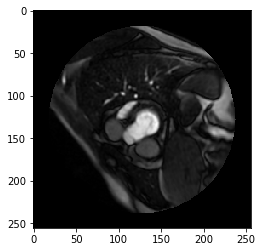

In [62]:
plt.imshow(d.pixel_array, cmap='gray')

In [64]:
! ls "/home/euloo/Documents/datasets/scd/SCD_ManualContours/"

CC0_License.htm		 SC-HF-I-09   SC-HF-NI-13  SC-HYP-07  SC-N-03
ODC_Community_norms.pdf  SC-HF-I-10   SC-HF-NI-14  SC-HYP-08  SC-N-05
README.txt		 SC-HF-I-11   SC-HF-NI-15  SC-HYP-09  SC-N-06
SC-HF-I-01		 SC-HF-I-12   SC-HF-NI-31  SC-HYP-10  SC-N-07
SC-HF-I-02		 SC-HF-I-40   SC-HF-NI-33  SC-HYP-11  SC-N-09
SC-HF-I-04		 SC-HF-NI-03  SC-HF-NI-34  SC-HYP-12  SC-N-10
SC-HF-I-05		 SC-HF-NI-04  SC-HF-NI-36  SC-HYP-37  SC-N-11
SC-HF-I-06		 SC-HF-NI-07  SC-HYP-01    SC-HYP-38  SC-N-40
SC-HF-I-07		 SC-HF-NI-11  SC-HYP-03    SC-HYP-40
SC-HF-I-08		 SC-HF-NI-12  SC-HYP-06    SC-N-02
